<span style = "font-family:Comic Sans MS, cursive, sans-serif;
               font-size: 0.8em;
               color: gray;
               background-color: white">
               Info: click the 🐍 symbol for viewing the source code (based on Andrew's NG Deep Learning courses !!)
</span>

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 2em;
               color: black;
               background-color: white">
               Oop's !! Deep Neural Network from Scratch...
</span>

In [17]:
from dnn.initialization import Initialization as init
from dnn.activation import Activation as activate
from processing import *
np.random.seed(1)
%reload_ext autoreload
%autoreload 2

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Processing...
</span>
<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.2em;
               color: black;
               background-color: white">
               let's roll 🎶
<span style="font-family:Candara; font-size:1em; #color:WHITE;#background-color:LightSeaGreen "> [🐍](./processing.py)</span>

![processing][image_ref_syy3ak06]

[image_ref_syy3ak06]: 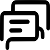

trainX and testX shapes >>  12288 209 12288 50


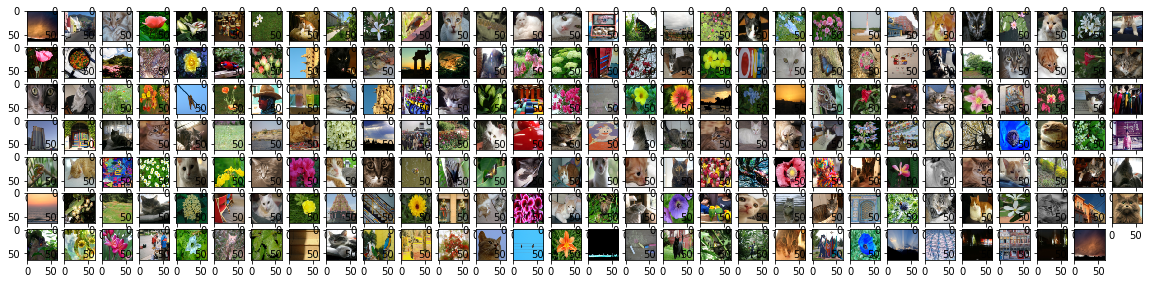

In [2]:
trainF, trainL, testF, testL, classes = repackNgDatasets() ; exploringImages(trainF)
trainX, testX = flatteningImages(trainF, testF)

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Activation...
</span>
<span style="font-family:Candara; font-size:1em; #color:WHITE;#background-color:LightSeaGreen "> [🐍](./dnn/activation.py)</span>
![Activation][image_ref_bmt1vdn5]

[image_ref_bmt1vdn5]: 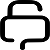

<span style="font-family:Candara; font-size:1em; #color:WHITE;#background-color:LightSeaGreen "> [See forward](#forward)</span>
<span style="font-family:Candara; font-size:1em; #color:WHITE;#background-color:LightSeaGreen "> [and backward passes...](#backward)</span>

In [ ]:
%pycat ./dnn/activation.py

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Initialization...
</span>
<span style="font-family:Candara; font-size:1em; #color:WHITE;#background-color:LightSeaGreen "> [🐍](./dnn/initialization.py)</span>

![Initialization][image_ref_tyq0xbu8]

[image_ref_tyq0xbu8]: 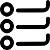

<span style="font-family:Candara; font-size:1em; #color:WHITE;#background-color:LightSeaGreen "> [See the model...](#model)</span>

In [ ]:
%pycat ./dnn/initialization.py

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Forward Propagation...
</span>

![Forward][image_ref_ndmxz8d0]

[image_ref_ndmxz8d0]: 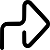


<a id='forward'></a>

In [4]:
def forwardPass(X, parameters):

    A = X
    L = len(parameters) // 2
    caches = []

    # Hidden Layers...
    for l in range(1, L):
        AP = A
        Wl = 'W' + str(l)
        bl = 'b' + str(l)
        ##############################################################
        A = activate('ReLU', False,
                              parameters[Wl].dot(AP) + parameters[bl],
                              None).compute()
        linearCache = (AP, parameters[Wl], parameters[bl])
        activationCache = parameters[Wl].dot(AP) + parameters[bl]
        caches.append((linearCache, activationCache))

    # Output Layer...
    WL = 'W' + str(L)
    bL = 'b' + str(L)
    ##################################################################
    AL = activate('Sigmoid', False,
                           parameters[WL].dot(A) + parameters[bL],
                           None).compute()
    linearCache = (A, parameters[WL], parameters[bL])
    activationCache = parameters[WL].dot(A) + parameters[bL]
    caches.append((linearCache, activationCache))

    return AL, caches

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Loss & Cost Computing...
</span>

![Loss and Cost Computing][image_ref_wffecri0]

[image_ref_wffecri0]: 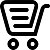


In [5]:
def computeCost(AL, Y):
    m = Y.shape[1]
    return np.squeeze(
        (1. / m) * (-np.dot(Y,
                            np.log(AL).T) - np.dot(1 - Y,
                                                   np.log(1 - AL).T)))

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Backward Propagation...
</span>

![backward][image_ref_o9kyay67]

[image_ref_o9kyay67]: 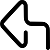

<a id='backward'></a>

In [6]:
def backwardPass(AL, Y, caches):
    grads = {}
    L = len(caches)
    Y = Y.reshape(AL.shape)

    # Initializing the backpropagation
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    linearCache, activationCache = caches[L - 1]
    AP, W, b = linearCache
    m = AP.shape[1]
    ##############################################################
    dZ = activate('Sigmoid', True, activationCache, dAL).compute()

    grads["dA" + str(L - 1)] = np.dot(W.T, dZ)
    grads["dW" + str(L)] = 1. / m * np.dot(dZ, AP.T)
    grads["db" + str(L)] = 1. / m * np.sum(dZ, axis=1, keepdims=True)

    for l in reversed(range(L - 1)):
        linearCache, activationCache = caches[l]
        AP, W, b = linearCache
        m = AP.shape[1]
        ##########################################################
        dZ = activate('ReLU', True, activationCache,
                               grads["dA" + str(l + 1)]).compute()
        grads["dA" + str(l)] = np.dot(W.T, dZ)
        grads["dW" + str(l + 1)] = 1. / m * np.dot(dZ, AP.T)
        grads["db" + str(l + 1)] = 1. / m * np.sum(dZ, axis=1, keepdims=True)

    return grads

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Weights Updating...
</span>

![Update][image_ref_95hj81z6]

[image_ref_95hj81z6]: 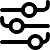


In [7]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
            learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
            learning_rate * grads["db" + str(l+1)]

    return parameters

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Prediction...
</span>

![Prediction][image_ref_1x45se6c]

[image_ref_1x45se6c]: 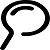


In [8]:
def predict(X, y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1, m))

    probas, caches = forwardPass(X, parameters)

    for i in range(0, probas.shape[1]):
        p[0, i] = 1 if probas[0, i] > 0.5 else 0

    print("Accuracy: " + str(np.sum((p == y) / m)))

    return p

<span style = "font-family: Comic Sans MS, cursive, sans-serif;
               font-size: 1.8em;
               color: black;
               background-color: white">
               Modelization...
</span>

![Modelization][image_ref_hdzkittd]

[image_ref_hdzkittd]: 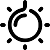

<a id='model'></a>

In [23]:
def L_layer_model(X,
                  Y,
                  layersDims,
                  learning_rate,
                  num_iterations,
                  print_cost=False):

    np.random.seed(1)

    costs = []

    parameters = init(layersDims).compute()

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = forwardPass(X, parameters)
        cost = computeCost(AL, Y)
        grads = backwardPass(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 training examples and plot the cost
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


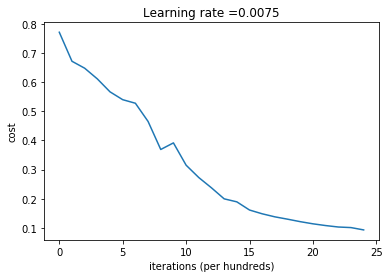

In [24]:
parameters = L_layer_model(trainX,
                           trainL,
                           learning_rate=0.0075,
                           layersDims=[12288, 20, 7, 5, 1],
                           num_iterations=2500,
                           print_cost=True)

In [25]:
pred_train = predict(trainX, trainL, parameters)

Accuracy: 0.9856459330143539


In [26]:
pred_test = predict(testX, testL, parameters)

Accuracy: 0.8
